In [331]:
import torch
from torchvision.transforms import Resize
import os
from PIL import Image
import matplotlib.pyplot as plt

In [336]:
resize = Resize((320, 320))

In [3]:
save_dict = torch.load('attention_2759')

In [394]:
patient_0 = save_dict['patient'][5]
study_0 = save_dict['study_id'][5]

In [395]:
train_root = '/home/suo/data/CheXpert-v1.0/train'

In [396]:
path_0 = os.path.join(train_root, patient_0, study_0)

In [397]:
frontal_0 = os.path.join(path_0, 'view1_frontal.jpg')
lateral_0 = os.path.join(path_0, 'view2_lateral.jpg')

In [398]:
frontal_mask = save_dict['frontal_mask']

In [399]:
frontal_mask.shape # N x 1 x 

torch.Size([8, 1, 80, 80, 80])

In [421]:
# This is for patient 0, row 80-84, column 80-84 on the frontal view

x = 60
y = 30

row_mask = frontal_mask[0, 0, x, y]
row_mask

tensor([6.5041e-04, 1.4549e-04, 2.1698e-05, 2.3630e-05, 2.4146e-05, 3.1671e-05,
        3.3506e-05, 2.8923e-05, 2.4050e-05, 4.1328e-05, 1.8690e-04, 7.9101e-04,
        3.5322e-03, 5.4865e-03, 4.5769e-03, 2.5685e-03, 1.5521e-03, 3.5147e-03,
        1.0329e-02, 2.9823e-02, 6.6402e-02, 1.1243e-01, 1.3213e-01, 5.4769e-02,
        1.0812e-02, 2.7117e-03, 2.6974e-03, 1.2775e-02, 4.6859e-02, 7.7017e-02,
        4.5548e-02, 2.0339e-02, 1.2160e-02, 1.0391e-02, 1.0550e-02, 1.0312e-02,
        8.6113e-03, 7.5986e-03, 1.0196e-02, 1.3982e-02, 1.3830e-02, 1.0433e-02,
        8.8165e-03, 1.0960e-02, 1.0902e-02, 3.8945e-03, 7.8387e-04, 5.0756e-04,
        5.5593e-04, 8.5215e-04, 1.6684e-03, 3.4149e-03, 6.4206e-03, 1.3428e-02,
        1.3627e-02, 7.0998e-03, 5.0486e-03, 3.5757e-03, 3.4214e-03, 5.0962e-03,
        5.3886e-03, 5.4168e-03, 6.9447e-03, 1.2120e-02, 1.9642e-02, 1.9278e-02,
        1.2952e-02, 2.0381e-02, 1.7709e-02, 1.1840e-02, 5.8624e-03, 1.1926e-03,
        4.6247e-04, 1.5572e-04, 4.8046e-

In [422]:
frontal = Image.open(frontal_0)
frontal = resize(frontal)
lateral = Image.open(lateral_0)
lateral = resize(lateral)
frontal_np = np.array(frontal)
lateral_np = np.array(lateral)

In [423]:
a = int(x / 80. * frontal_np.shape[0])
b = int((x + 1) / 80. * frontal_np.shape[0])
c = int(y / 80. * frontal_np.shape[1])
d = int((y + 1) / 80. * frontal_np.shape[1])

In [424]:
frontal_np[a:b, c:d] = 255

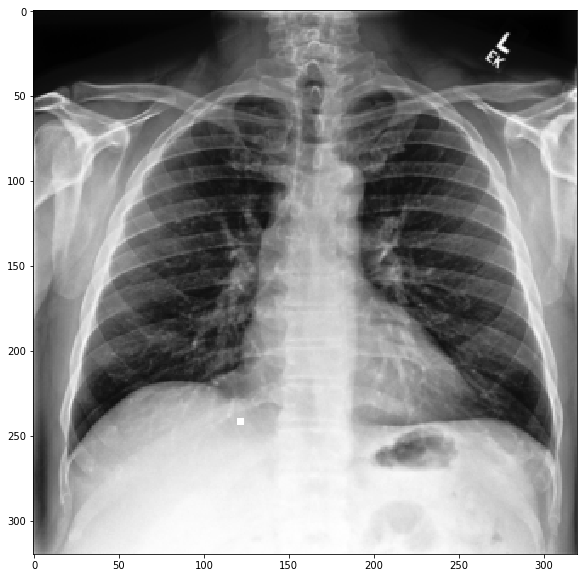

In [425]:
plt.figure(figsize=(10, 10))
plt.imshow(frontal_np, cmap='gray')
plt.show()

In [426]:
mask = np.repeat(row_mask.cpu().numpy(), 4) 
mask = mask / mask.max() * 255
lateral_np[a:b] = mask

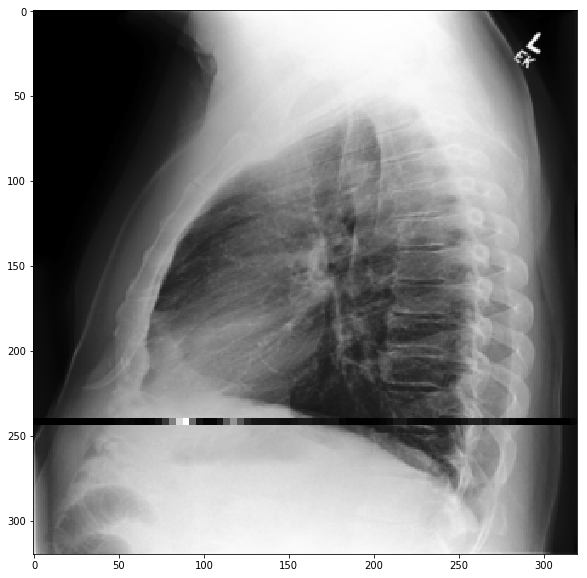

In [427]:
plt.figure(figsize=(10, 10))
plt.imshow(lateral_np, cmap='gray')
plt.show()